In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [49]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

In [50]:
import warnings
warnings.filterwarnings('ignore')

(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [51]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [62]:
y_train # its a 2D array, we have to convert it 1D in order to showcase the classes

y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_train[:5], y_test[:5]

# Now its converted to 1D array

(array([6, 9, 9, 4, 1], dtype=uint8), array([3, 8, 8, 0, 6], dtype=uint8))

In [53]:
classes = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
]

In [54]:
X_train[0] # Its a 3D array

def show_image(X, y, index):
    plt.figure(figsize = (15, 2))
    plt.imshow(X_train[index])
    plt.xlabel(classes[y[index]])

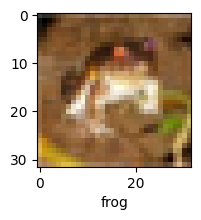

In [55]:
show_image(X_train, y_train, 0)

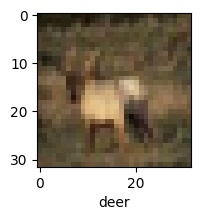

In [56]:
show_image(X_train, y_train, 3)

In [57]:
X_train[0] # lets scale this dataset

X_train = X_train / 255
X_test = X_test / 255

X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000,))

## Testing with ANN to compare the results with the CNN

In [59]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(3000, activation='relu'),
    
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer = 'Adam',
    # If y is one hot encoded, then we use categorial_crossentropy, else sparse
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 346s 220ms/step - accuracy: 0.2748 - loss: 2.1909
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 338s 216ms/step - accuracy: 0.3804 - loss: 1.7113
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 349s 223ms/step - accuracy: 0.4098 - loss: 1.6469
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 347s 222ms/step - accuracy: 0.4202 - loss: 1.6153
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 354s 226ms/step - accuracy: 0.4317 - loss: 1.5756


In [63]:
from sklearn.metrics import classification_report

model.evaluate(X_test, y_test)

y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('Classification report: \n', classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.4398 - loss: 1.5640
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step
Classification report: 
               precision    recall  f1-score   support

           0       0.54      0.47      0.50      1000
           1       0.54      0.57      0.55      1000
           2       0.37      0.16      0.22      1000
           3       0.32      0.26      0.29      1000
           4       0.28      0.54      0.37      1000
           5       0.51      0.19      0.28      1000
           6       0.44      0.52      0.47      1000
           7       0.46      0.53      0.49      1000
           8       0.58      0.60      0.59      1000
           9       0.47      0.55      0.51      1000

    accuracy                           0.44     10000
   macro avg       0.45      0.44      0.43     10000
weighted avg       0.45      0.44      0.43     10000



## Using CNN to improve the model to learn from the images

In [65]:
CNN = keras.Sequential([

    # CNN
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPool2D(2, 2),
    
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPool2D(2, 2),

    # Dene
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

CNN.compile(
    optimizer = 'Adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

CNN.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 20ms/step - accuracy: 0.3556 - loss: 1.7579
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.5527 - loss: 1.2649
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.5999 - loss: 1.1278
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.6366 - loss: 1.0314
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.6593 - loss: 0.9746


## Showing how softmax work

#### 1. **Sigmoid:**
class 1: 0.45 <br> 
class 2: 0.67 <br>
<br>
#### 2. **Softmax would calculate value like this:**
(0.45) / (0.45 + 0.67) => 0.40<br>
(0.67) / (0.45 + 0.67) => 0.59


In [66]:
CNN.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6561 - loss: 0.9860


[0.986335277557373, 0.6586999893188477]

In [67]:
y_pred = CNN.predict(X_test)
y_pred_class = [np.argmax(i) for i in y_pred]

print("Classification repot: \n", classification_report(y_test, y_pred_class))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Classification repot: 
               precision    recall  f1-score   support

           0       0.72      0.66      0.69      1000
           1       0.80      0.77      0.78      1000
           2       0.50      0.55      0.52      1000
           3       0.47      0.53      0.50      1000
           4       0.59      0.62      0.61      1000
           5       0.60      0.56      0.58      1000
           6       0.76      0.72      0.74      1000
           7       0.68      0.73      0.70      1000
           8       0.76      0.76      0.76      1000
           9       0.78      0.70      0.74      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000



In [82]:
print(classes[y_pred_class[13]])
print(classes[y_test[13]])

horse
horse
